# DallaMan2006 Model
Model of the insulin-glucose system.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
# global settings for plots
plt.rcParams.update({
        'axes.labelsize': 'large', 
        'axes.labelweight': 'bold',
        'axes.titlesize': 'large',
        'axes.titleweight': 'bold',
        'legend.fontsize': 'small',
        'xtick.labelsize': 'large',
        'ytick.labelsize': 'large',
    })

![title](./docs/DallaMan2006_Fig1.png)

In [2]:
# load experimental data
df_glc = pd.read_csv('./data/DallaMan2006_Fig1_glc.csv', sep='\t')
df_ins = pd.read_csv('./data/DallaMan2006_Fig1_ins.csv', sep='\t')
df_egp = pd.read_csv('./data/DallaMan2006_Fig1_egp.csv', sep='\t')
df_gra = pd.read_csv('./data/DallaMan2006_Fig1_gra.csv', sep='\t')
df_gu = pd.read_csv('./data/DallaMan2006_Fig1_gu.csv', sep='\t')
df_inssec = pd.read_csv('./data/DallaMan2006_Fig1_inssec.csv', sep='\t')
df_ins.head()

,time,ins,ins_pm_sd,ins_sd
0,0.72,26.02,41.33,15.31
1,6.46,33.67,52.04,18.37
2,10.05,47.45,104.08,56.63
3,15.08,114.80,211.22,96.43
4,20.82,185.20,367.35,182.14


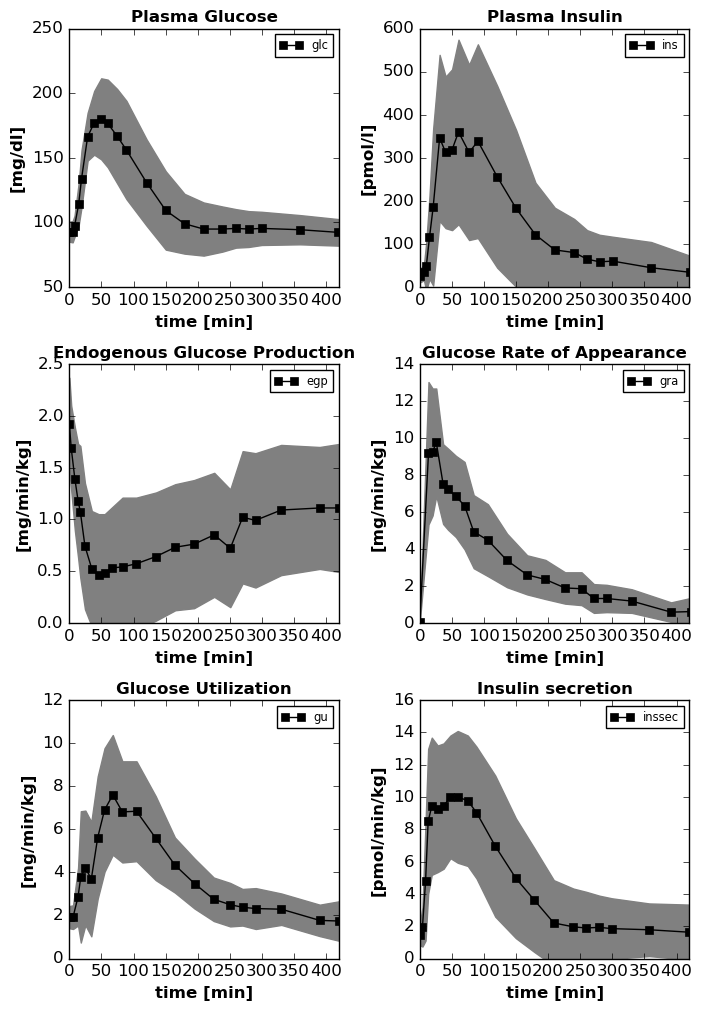

In [3]:
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

df = df_glc
ax1.fill_between(df.time, df.glc+df.glc_sd, df.glc-df.glc_sd, color='gray')
ax1.plot(df.time, df.glc, 's-', color='black')
ax1.set_title('Plasma Glucose')
ax1.set_xlabel('time [min]')
ax1.set_ylabel('[mg/dl]')
ax1.legend()
ax1.set_xlim(0,420)
ax1.set_ylim(50,250)

df = df_ins
ax2.fill_between(df.time, df.ins+df.ins_sd, df.ins-df.ins_sd, color='gray')
ax2.plot(df.time, df.ins, 's-', color='black')
ax2.set_title('Plasma Insulin')
ax2.set_xlabel('time [min]')
ax2.set_ylabel('[pmol/l]')
ax2.legend()
ax2.set_xlim(0,420)
ax2.set_ylim(0,600)

df = df_egp
ax3.fill_between(df.time, df.egp+df.egp_sd, df.egp-df.egp_sd, color='gray')
ax3.plot(df.time, df.egp, 's-', color='black')
ax3.set_title('Endogenous Glucose Production')
ax3.set_xlabel('time [min]')
ax3.set_ylabel('[mg/min/kg]')
ax3.legend()
ax3.set_xlim(0,420)
ax3.set_ylim(0,2.5)

df = df_gra
ax4.fill_between(df.time, df.gra+df.gra_sd, df.gra-df.gra_sd, color='gray')
ax4.plot(df.time, df.gra, 's-', color='black')
ax4.set_title('Glucose Rate of Appearance')
ax4.set_xlabel('time [min]')
ax4.set_ylabel('[mg/min/kg]')
ax4.legend()
ax4.set_xlim(0,420)
ax4.set_ylim(0, 14)

df = df_gu
ax5.fill_between(df.time, df.gu+df.gu_sd, df.gu-df.gu_sd, color='gray')
ax5.plot(df.time, df.gu, 's-', color='black')
ax5.set_title('Glucose Utilization')
ax5.set_xlabel('time [min]')
ax5.set_ylabel('[mg/min/kg]')
ax5.legend()
ax5.set_xlim(0,420)
ax5.set_ylim(0, 12)

df = df_inssec
ax6.fill_between(df.time, df.inssec+df.inssec_sd, df.inssec-df.inssec_sd, color='gray')
ax6.plot(df.time, df.inssec, 's-', color='black')
ax6.set_title('Insulin secretion')
ax6.set_xlabel('time [min]')
ax6.set_ylabel('[pmol/min/kg]')
ax6.legend()
ax6.set_xlim(0,420)
ax6.set_ylim(0, 16)

plt.show()

## Model simulations

In [27]:
import tellurium as te
from roadrunner import SelectionRecord

In [9]:
version = 1
r = te.loads('./results/DallaMan2006_{}.xml'.format(version))
print(r.timeCourseSelections)
r.timeCourseSelections += r.getGlobalParameterIds() 
print(r.timeCourseSelections)

['time', 'Gp', 'Gt', 'Il', 'Ip', 'Qsto1', 'Qsto2', 'Qgut', 'I1', 'Id', 'INS', 'Ipo', 'Y']
['time', 'Gp', 'Gt', 'Il', 'Ip', 'Qsto1', 'Qsto2', 'Qgut', 'I1', 'Id', 'INS', 'Ipo', 'Y', 'BW', 'D', 'V_G', 'k_1', 'k_2', 'G_b', 'V_I', 'm_1', 'm_2', 'm_4', 'm_5', 'm_6', 'HE_b', 'I_b', 'S_b', 'k_max', 'k_min', 'k_abs', 'k_gri', 'f', 'b', 'd', 'k_p1', 'k_p2', 'k_p3', 'k_p4', 'k_i', 'U_ii', 'V_m0', 'V_mX', 'K_m0', 'V_f0', 'V_fX', 'K_f0', 'p_2U', 'part', 'K', 'alpha', 'beta', 'gamma', 'k_e1', 'k_e2', 'Gp', 'Gt', 'Il', 'Ip', 'Qsto1', 'Qsto2', 'Qgut', 'I1', 'Id', 'INS', 'Ipo', 'Y', 'aa', 'cc', 'EGP', 'V_mmax', 'V_fmax', 'E', 'S', 'I', 'G', 'HE', 'm_3', 'Q_sto', 'Ra', 'k_empt', 'U_idm', 'U_idf', 'U_id', 'U', 'S_po']


In [28]:
# simulate normal model
r.resetToOrigin()
r.resetAll()
r.reset()
s = r.simulate(0, 400, steps=401)

# simulation for diabetes
t2dm_pars = {
    'V_G': 1.49,
    'k_1': 0.042,
    'k_2': 0.071,
    'V_I': 0.04,
    'm_1': 0.379,
    'm_2': 0.673,
    'm_4': 0.269,
    'm_5': 0.0526,
    'm_6': 0.8118,
    'HE_b': 0.6,
    'k_max': 0.0465,
    'k_min': 0.0076,
    'k_abs': 0.023,
    'k_gri': 0.0465,
    'f': 0.90,
    'b': 0.68,
    'd': 0.09,
    'k_p1': 3.09,
    'k_p2': 0.0007,
    'k_p3': 0.005,
    'k_p4': 0.0786,
    'k_i': 0.0066,
    'U_ii': 1.0,
    'V_m0': 4.65,
    'V_mX': 0.034,
    'K_m0': 466.21,
    
    'V_f0': 4.65,
    'V_fX': 0.034,
    'K_f0': 466.21,
    'p_2U': 0.0840,
    'K': 0.99,
    'alpha': 0.013,
    'beta': 0.05,
    'gamma': 0.5, 
    'k_e1': 0.0007,
    'k_e2': 269,
}
for key, value in t2dm_pars.iteritems():
    r[key] = value
r.reset(SelectionRecord.DEPENDENT_INITIAL_GLOBAL_PARAMETER)
s_t2dm = r.simulate(0, 400, steps=401)

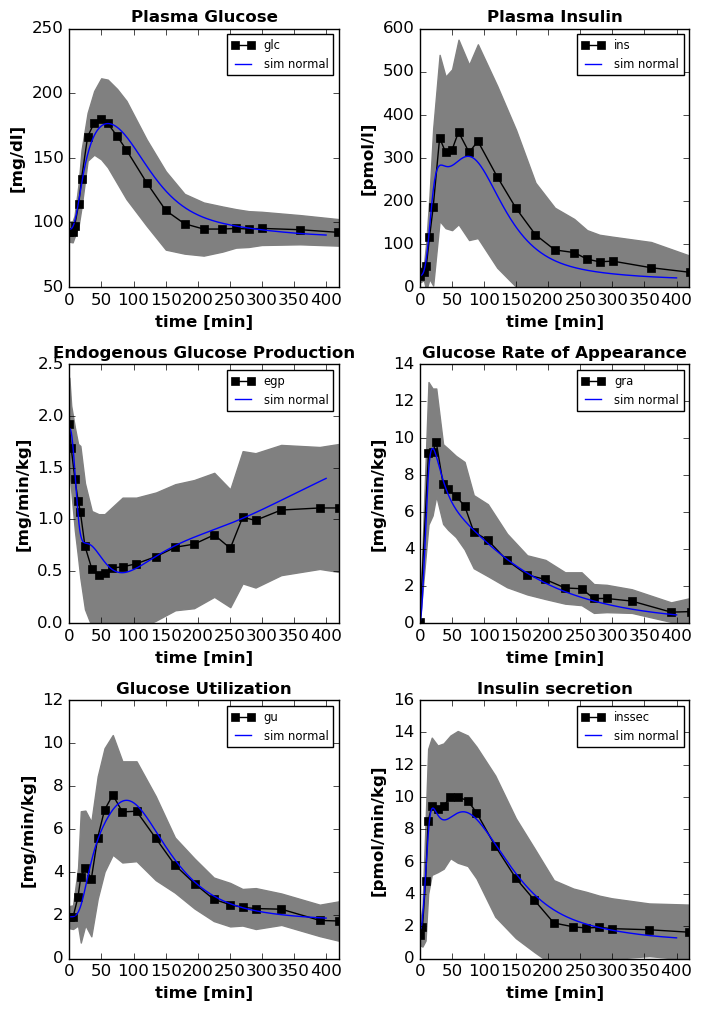

In [31]:
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

df = df_glc
ax1.fill_between(df.time, df.glc+df.glc_sd, df.glc-df.glc_sd, color='gray')
ax1.plot(df.time, df.glc, 's-', color='black')
ax1.plot(s['time'], s['G'], color='blue', label='sim normal')
# ax1.plot(s_t2dm['time'], s_t2dm['G'], color='red', label='sim t2dm')
ax1.set_title('Plasma Glucose')
ax1.set_xlabel('time [min]')
ax1.set_ylabel('[mg/dl]')
ax1.legend()
ax1.set_xlim(0,420)
ax1.set_ylim(50,250)

df = df_ins
ax2.fill_between(df.time, df.ins+df.ins_sd, df.ins-df.ins_sd, color='gray')
ax2.plot(df.time, df.ins, 's-', color='black')
ax2.plot(s['time'], s['I'], color='blue', label='sim normal')
ax2.set_title('Plasma Insulin')
ax2.set_xlabel('time [min]')
ax2.set_ylabel('[pmol/l]')
ax2.legend()
ax2.set_xlim(0,420)
ax2.set_ylim(0,600)

df = df_egp
ax3.fill_between(df.time, df.egp+df.egp_sd, df.egp-df.egp_sd, color='gray')
ax3.plot(df.time, df.egp, 's-', color='black')
ax3.plot(s['time'], s['EGP'], color='blue', label='sim normal')
ax3.set_title('Endogenous Glucose Production')
ax3.set_xlabel('time [min]')
ax3.set_ylabel('[mg/min/kg]')
ax3.legend()
ax3.set_xlim(0,420)
ax3.set_ylim(0,2.5)

df = df_gra
ax4.fill_between(df.time, df.gra+df.gra_sd, df.gra-df.gra_sd, color='gray')
ax4.plot(df.time, df.gra, 's-', color='black')
ax4.plot(s['time'], s['Ra'], color='blue', label='sim normal')
ax4.set_title('Glucose Rate of Appearance')
ax4.set_xlabel('time [min]')
ax4.set_ylabel('[mg/min/kg]')
ax4.legend()
ax4.set_xlim(0,420)
ax4.set_ylim(0, 14)

df = df_gu
ax5.fill_between(df.time, df.gu+df.gu_sd, df.gu-df.gu_sd, color='gray')
ax5.plot(df.time, df.gu, 's-', color='black')
ax5.plot(s['time'], s['U'], color='blue', label='sim normal')
ax5.set_title('Glucose Utilization')
ax5.set_xlabel('time [min]')
ax5.set_ylabel('[mg/min/kg]')
ax5.legend()
ax5.set_xlim(0,420)
ax5.set_ylim(0, 12)

df = df_inssec
ax6.fill_between(df.time, df.inssec+df.inssec_sd, df.inssec-df.inssec_sd, color='gray')
ax6.plot(df.time, df.inssec, 's-', color='black')
ax6.plot(s['time'], s['S'], color='blue', label='sim normal')
ax6.set_title('Insulin secretion')
ax6.set_xlabel('time [min]')
ax6.set_ylabel('[pmol/min/kg]')
ax6.legend()
ax6.set_xlim(0,420)
ax6.set_ylim(0, 16)

plt.show()